# Decision Tree vs Logistic Regression for Prudential Data

### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [2]:
# Importing the train dataset for Prudential Life Insurance Assessment from Kaggle
df = pd.read_csv("train.csv.zip")

In [3]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


### Data Pre Processing

<AxesSubplot:>

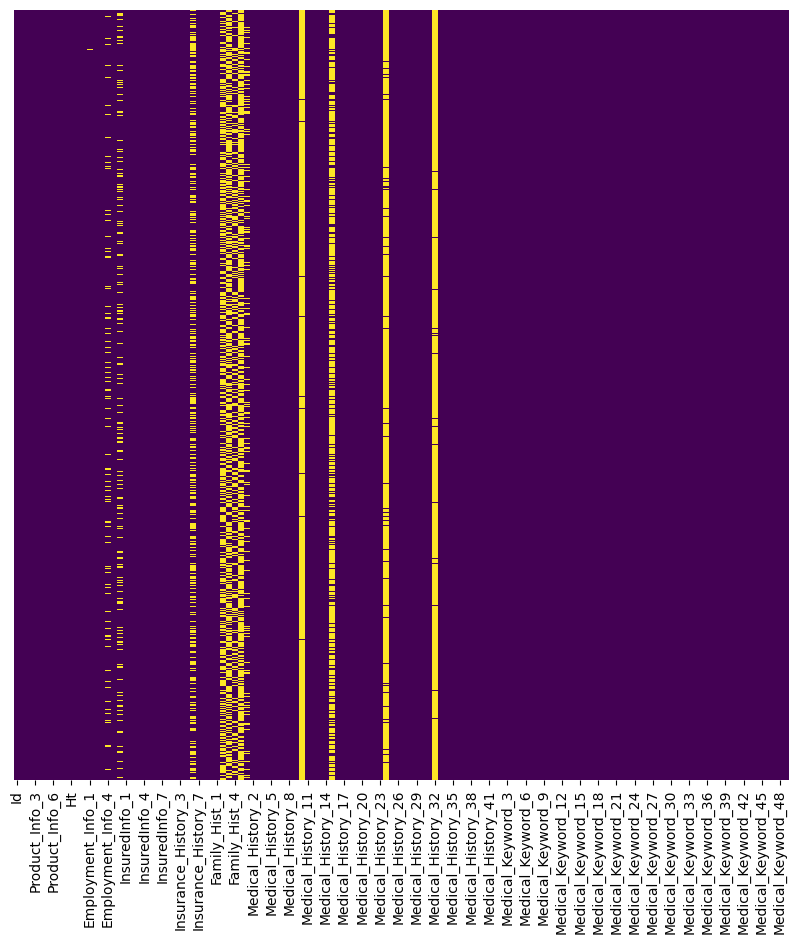

In [4]:
# Checking for Missing Values
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull(),cmap = 'viridis', yticklabels = False, cbar = False)

In [5]:
# Since there are only at max 10 columns with missing values based on the above image
to_remove1 = df.isnull().sum().sort_values(ascending=False).head(20)

# Adding columns to remove in this list
to_remove = []
for i, val in enumerate(to_remove1):
    
    # More than 50% values are missing
    if val > 30000:
        to_remove.append(to_remove1.index[i])
df.drop(columns = to_remove, inplace = True)

In [6]:
# Columns with less than 50% missing values
fill_for_cols = df.isnull().sum().sort_values(ascending=False).head(7)

# Since Medical_History_1 is a categorical variable, replacing it with Mode
df['Medical_History_1'].fillna(df['Medical_History_1'].mode()[0], inplace=True)

# For continuous variables, replacing them with median
for column in fill_for_cols.index:
    df[column].fillna(df[column].median(), inplace=True)

In [7]:
# Given list of categorical variables
df.dtypes
objects = ["Product_Info_1",
"Product_Info_2",
"Product_Info_3",
"Product_Info_5",
"Product_Info_6",
"Product_Info_7",
"Employment_Info_2",
"Employment_Info_3",
"Employment_Info_5",
"InsuredInfo_1",
"InsuredInfo_2",
"InsuredInfo_3",
"InsuredInfo_4",
"InsuredInfo_5",
"InsuredInfo_6",
"InsuredInfo_7",
"Insurance_History_1",
"Insurance_History_2",
"Insurance_History_3",
"Insurance_History_4",
"Insurance_History_7",
"Insurance_History_8",
"Insurance_History_9",
"Family_Hist_1",
"Medical_History_2",
"Medical_History_3",
"Medical_History_4",
"Medical_History_5",
"Medical_History_6",
"Medical_History_7",
"Medical_History_8",
"Medical_History_9",
"Medical_History_11",
"Medical_History_12",
"Medical_History_13",
"Medical_History_14",
"Medical_History_16",
"Medical_History_17",
"Medical_History_18",
"Medical_History_19",
"Medical_History_20",
"Medical_History_21",
"Medical_History_22",
"Medical_History_23",
"Medical_History_25",
"Medical_History_26",
"Medical_History_27",
"Medical_History_28",
"Medical_History_29",
"Medical_History_30",
"Medical_History_31",
"Medical_History_33",
"Medical_History_34",
"Medical_History_35",
"Medical_History_36",
"Medical_History_37",
"Medical_History_38",
"Medical_History_39",
"Medical_History_40",
"Medical_History_41"]

# Creating dummy data for these columns and dropping the first column to remove redundancies
df = pd.get_dummies(df, columns = objects, drop_first=True)
df

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,Medical_History_36_3,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_2,Medical_History_41_3
0,2,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.00000,0.2500,0.000667,...,0,1,0,0,0,1,0,1,0,1
1,5,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.00000,0.0018,0.000133,...,0,1,0,0,0,1,0,1,0,0
2,6,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.00000,0.0300,0.000973,...,1,1,0,0,0,1,0,1,0,0
3,7,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.00000,0.2000,0.000973,...,0,1,0,0,0,1,0,1,0,0
4,8,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.00000,0.0500,0.000973,...,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,0.230769,0.074627,0.709091,0.320084,0.519103,0.020,0.00000,0.0250,0.000973,...,0,1,0,0,0,1,0,1,0,1
59377,79143,0.230769,0.432836,0.800000,0.403766,0.551119,0.100,0.00001,0.3500,0.000267,...,1,1,0,0,0,1,0,1,0,0
59378,79144,0.076923,0.104478,0.745455,0.246862,0.360969,0.035,0.00000,0.2500,0.000973,...,1,1,0,0,0,1,0,1,0,0
59379,79145,0.230769,0.507463,0.690909,0.276151,0.462452,0.038,0.00000,0.2500,0.000973,...,0,1,0,0,0,1,0,1,0,1


In [8]:
# Performing Normalisation
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = df.columns
df_scaled

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,Medical_History_36_3,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_2,Medical_History_41_3
0,0.000000,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.00000,0.2500,0.000667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.000038,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.00000,0.0018,0.000133,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000051,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.00000,0.0300,0.000973,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000063,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.00000,0.2000,0.000973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000076,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.00000,0.0500,0.000973,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.999949,0.230769,0.074627,0.709091,0.320084,0.519103,0.020,0.00000,0.0250,0.000973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
59377,0.999962,0.230769,0.432836,0.800000,0.403766,0.551119,0.100,0.00001,0.3500,0.000267,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59378,0.999975,0.076923,0.104478,0.745455,0.246862,0.360969,0.035,0.00000,0.2500,0.000973,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59379,0.999987,0.230769,0.507463,0.690909,0.276151,0.462452,0.038,0.00000,0.2500,0.000973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [9]:
# Creating X and y from the dataset
X = df_scaled.drop('Response', axis = 1)
y = df['Response']
X

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,Medical_History_36_3,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_2,Medical_History_41_3
0,0.000000,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0.00000,0.2500,0.000667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.000038,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0.00000,0.0018,0.000133,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000051,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0.00000,0.0300,0.000973,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000063,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0.00000,0.2000,0.000973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000076,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0.00000,0.0500,0.000973,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.999949,0.230769,0.074627,0.709091,0.320084,0.519103,0.020,0.00000,0.0250,0.000973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
59377,0.999962,0.230769,0.432836,0.800000,0.403766,0.551119,0.100,0.00001,0.3500,0.000267,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59378,0.999975,0.076923,0.104478,0.745455,0.246862,0.360969,0.035,0.00000,0.2500,0.000973,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
59379,0.999987,0.230769,0.507463,0.690909,0.276151,0.462452,0.038,0.00000,0.2500,0.000973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Training and Testing the data

In [10]:
from sklearn.tree import DecisionTreeClassifier
X_train = X
y_train = y

In [11]:
# Creating validation curve for DTree using cohen_kappa_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, cohen_kappa_score
score_function = make_scorer(cohen_kappa_score, weights="quadratic")

# Varying depth of the tree till 25
depth = np.arange(1, 25, 1)

# Performing 5-fold cross validation
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=depth,cv=5, scoring = score_function)

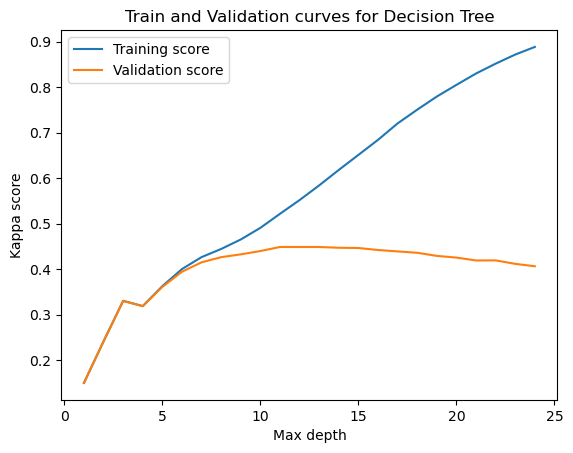

In [73]:
plt.figure()
plt.plot(depth, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth, np.mean(valid_scores, axis=1), label='Validation score')
plt.title('Train and Validation curves for Decision Tree')
plt.xlabel('Max depth')
plt.ylabel('Kappa score')
plt.legend(loc='upper left')
plt.show()

In [12]:
from sklearn.model_selection import learning_curve

# Change in kappa score with number of training examples for a max depth of 10
train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeClassifier(max_depth=10), X_train, y_train, train_sizes=[10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 45000], cv=5, scoring = score_function)

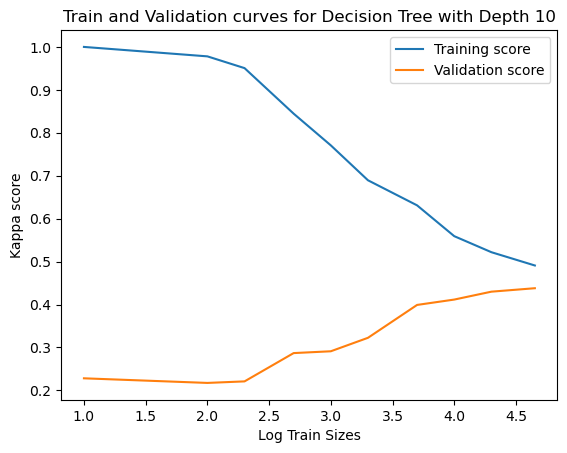

In [75]:
plt.figure()
plt.plot(np.log10(train_sizes), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.log10(train_sizes), np.mean(valid_scores, axis=1), label='Validation score')
plt.title('Train and Validation curves for Decision Tree with Depth 10')
plt.xlabel('Log Train Sizes')
plt.ylabel('Kappa score')
plt.legend(loc="upper right")
plt.show()

In [100]:
from sklearn.linear_model import LogisticRegression

# Checking for different values of C
C_range = [0.1, 0.5, 1, 5, 10, 100, 1000]
train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=1000), X_train, y_train, param_name="C", param_range=C_range,cv=5, scoring = score_function)

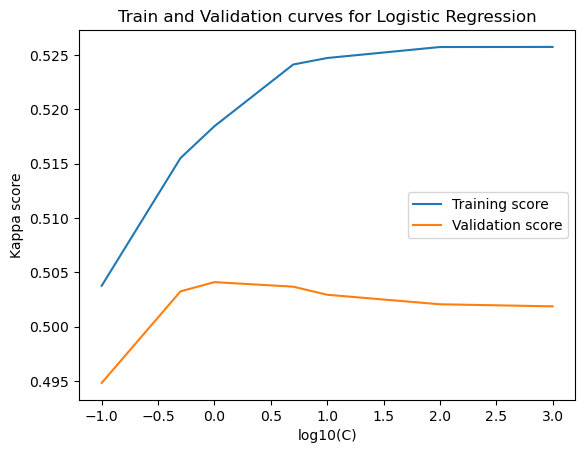

In [97]:
plt.figure()
plt.plot(np.log10(C_range), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.log10(C_range), np.mean(valid_scores, axis=1), label='Validation score')
plt.title('Train and Validation curves for Logistic Regression')
plt.xlabel('log10(C)')
plt.ylabel('Kappa score')
plt.legend(loc='center right')
plt.show()

In [15]:
# Change in kappa score with training example for a c value of 1
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(max_iter=1000, C = 1), X_train, y_train, train_sizes=[10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 45000], cv=5, scoring = score_function)


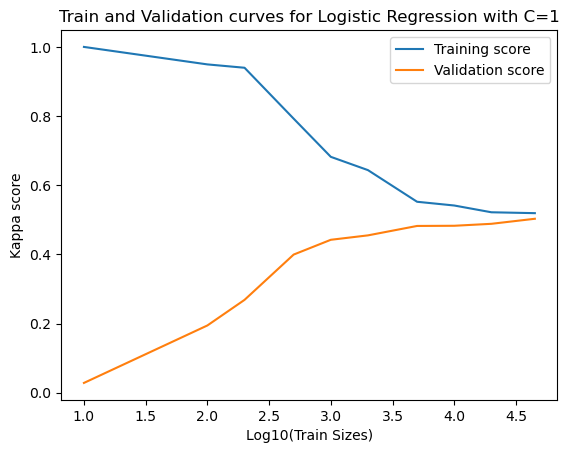

In [16]:
plt.figure()
plt.plot(np.log10(train_sizes), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.log10(train_sizes), np.mean(valid_scores, axis=1), label='Validation score')
plt.title('Train and Validation curves for Logistic Regression with C=1')
plt.xlabel('Log10(Train Sizes)')
plt.ylabel('Kappa score')
plt.legend(loc="upper right")
plt.show()